In [1]:
## Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Added for Google Colab
from google.colab import files
uploaded = files.upload()


Saving heart-disease (1).csv to heart-disease (1).csv


In [4]:
### Load the dataset
data = pd.read_csv('heart-disease (1).csv')
print('Shape of the data is:', data.shape)

data.info()

pd.set_option('display.float_format', lambda x: '%.3f' % x)
data.describe().transpose()

data.head()

Shape of the data is: (303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


In [5]:
# Check for missing values
print(data.isnull().sum())

print(data.columns)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [8]:
## Data Filtering
columns_to_drop = ['slope', 'ca']
existing_columns = [col for col in columns_to_drop if col in data.columns]
if existing_columns:
    data = data.drop(existing_columns, axis=1)
    print(f"Dropped columns: {existing_columns}")
else:
    print(f"Columns {columns_to_drop} not found in the DataFrame.")


data.shape

data.isnull

data.duplicated().sum()

Columns ['slope', 'ca'] not found in the DataFrame.


np.int64(1)

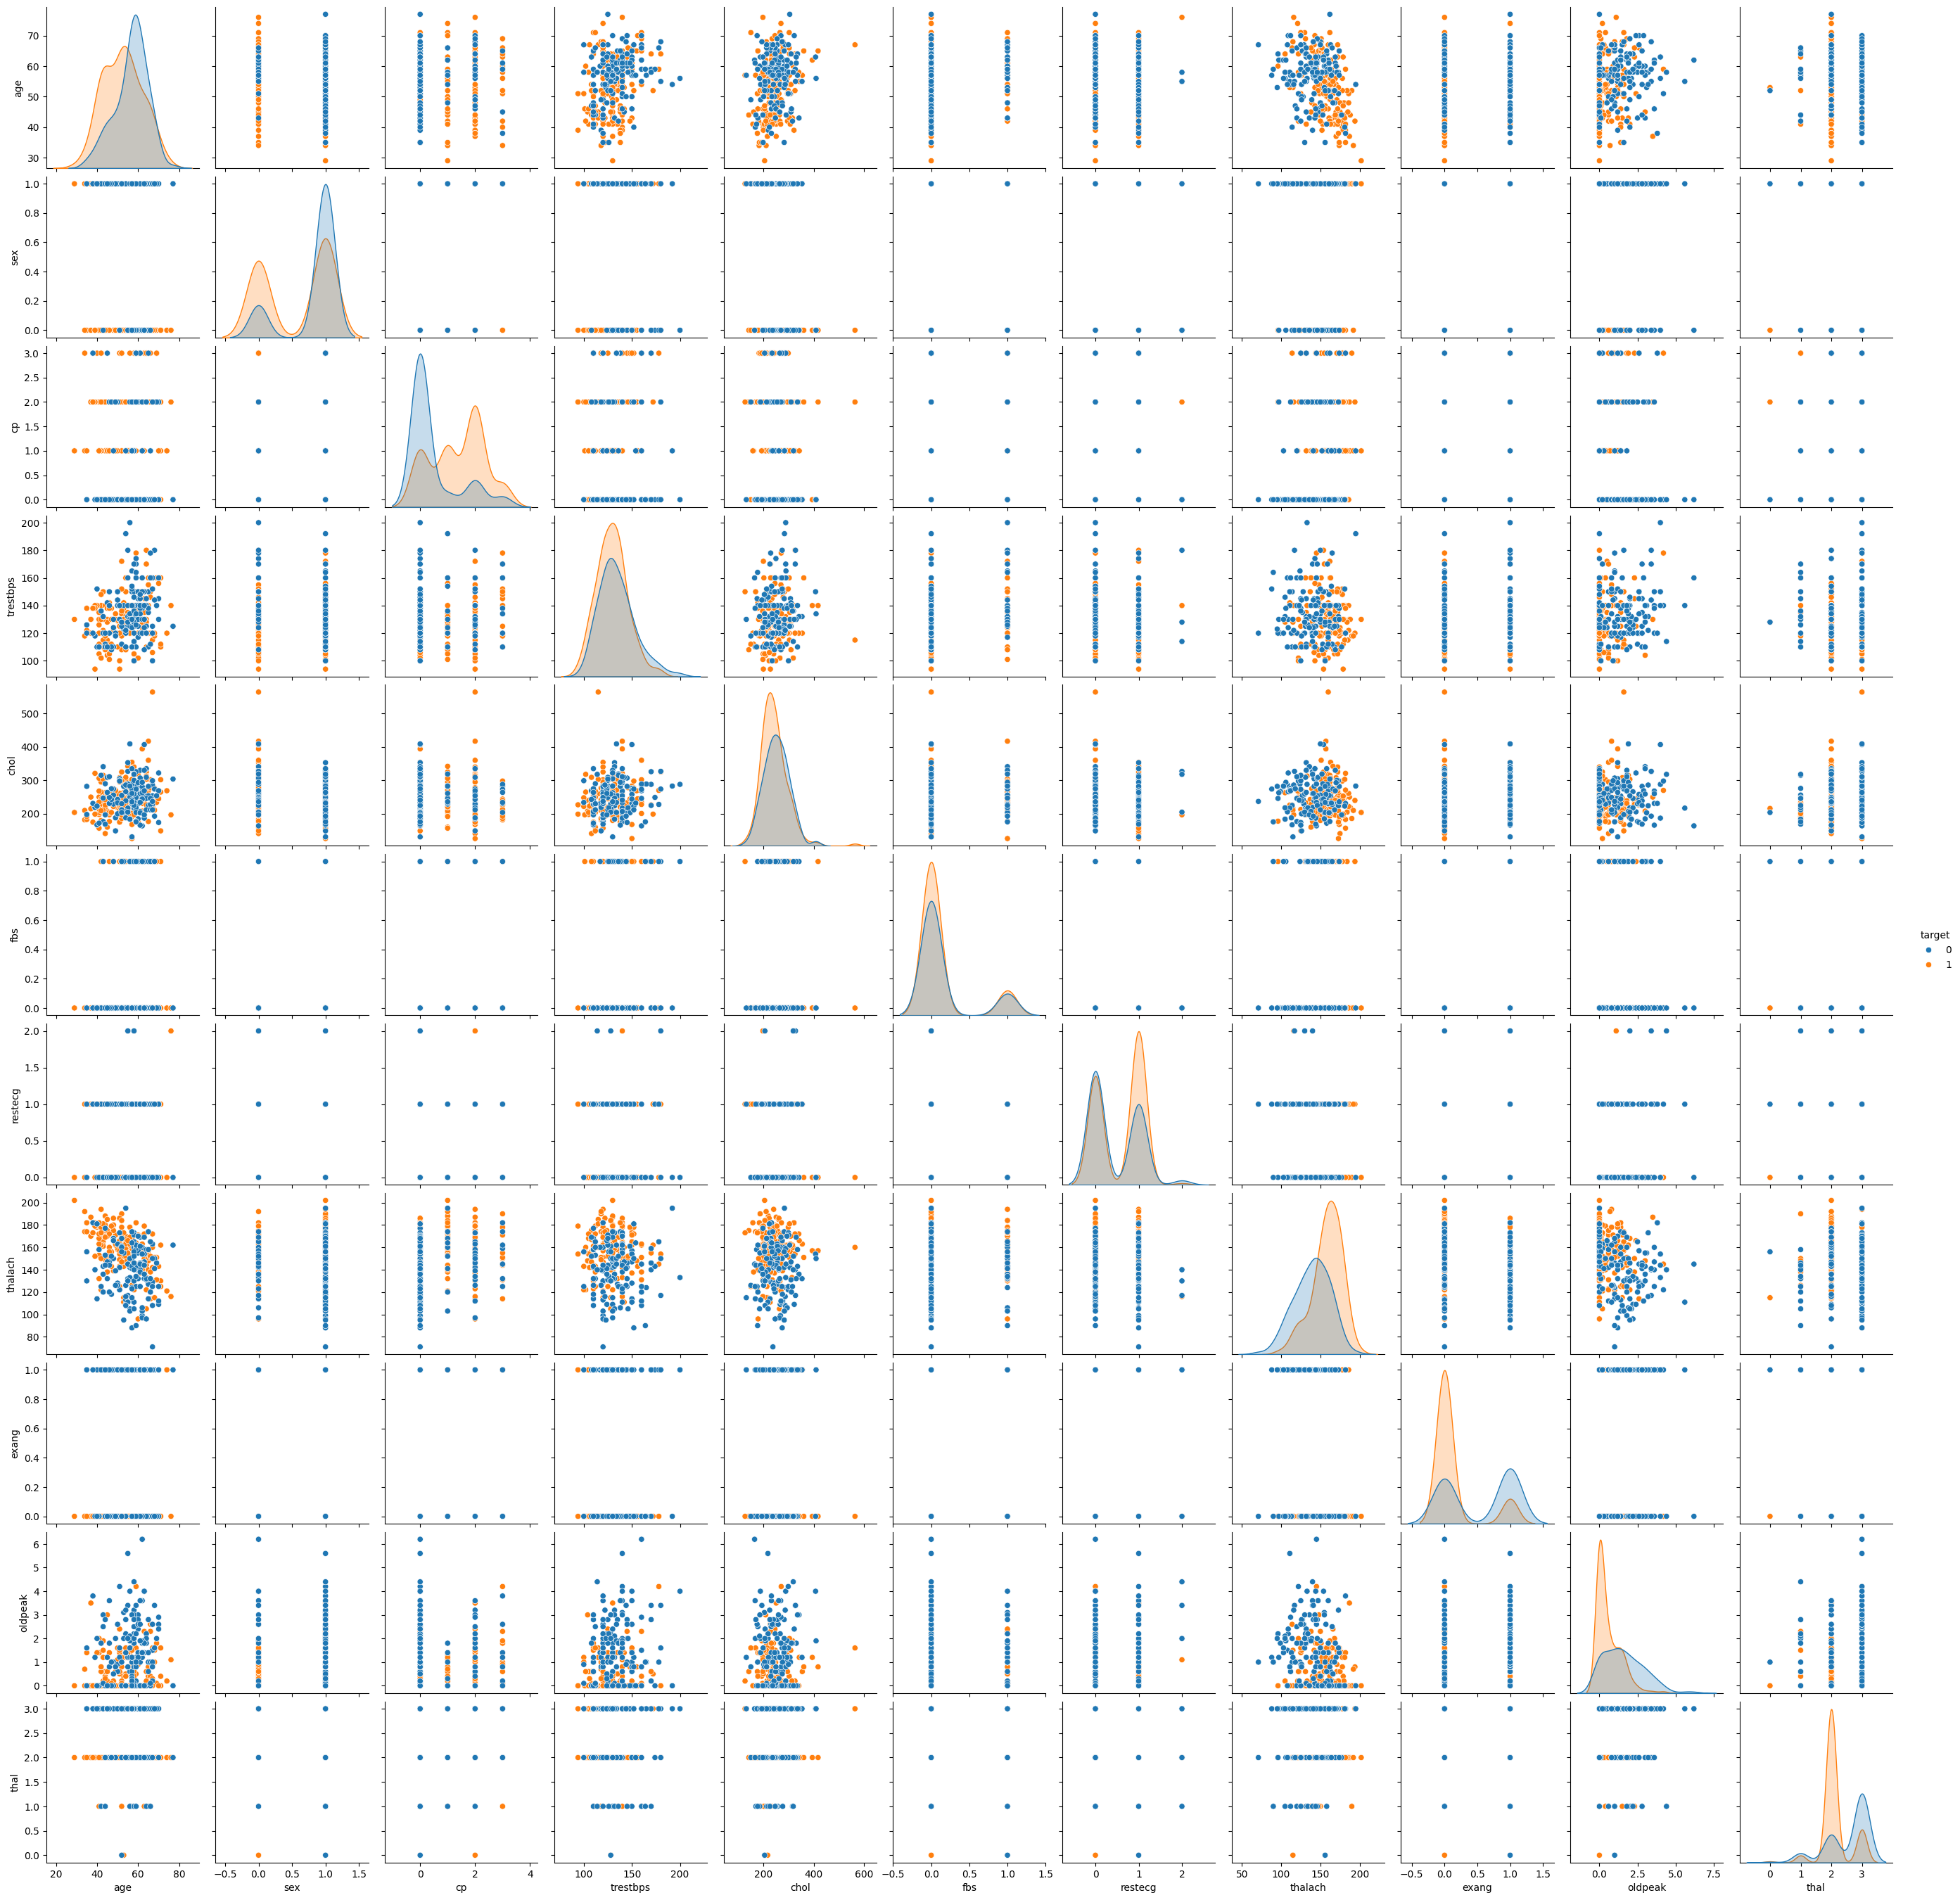

In [9]:
# Visualize data distribution
sns.pairplot(data, hue='target')

plt.show()

In [23]:
# Handle missing values (if any)
data.fillna(method='ffill', inplace=True)

/tmp/ipython-input-397355435.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [26]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
# Default parameters
rf_default = RandomForestClassifier()

rf_default.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
# Predictions and evaluation
y_pred_default = rf_default.predict(X_test)

print("Confusion Matrix (Default Parameters):")

print(confusion_matrix(y_test, y_pred_default))

print("Classification Report (Default Parameters):")

print(classification_report(y_test, y_pred_default))

Confusion Matrix (Default Parameters):
[[33  8]
 [ 9 41]]
Classification Report (Default Parameters):
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        41
           1       0.84      0.82      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [32]:
# Tuned parameters
rf_tuned = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [34]:
# Predictions and evaluation
y_pred_tuned = rf_tuned.predict(X_test)

print("Confusion Matrix (Tuned Parameters):")

print(confusion_matrix(y_test, y_pred_tuned))

print("Classification Report (Tuned Parameters):")

print(classification_report(y_test, y_pred_tuned))

Confusion Matrix (Tuned Parameters):
[[35  6]
 [ 9 41]]
Classification Report (Tuned Parameters):
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        41
           1       0.87      0.82      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



In [36]:
# Feature importance
importances = rf_tuned.feature_importances_

indices = np.argsort(importances)[::-1]

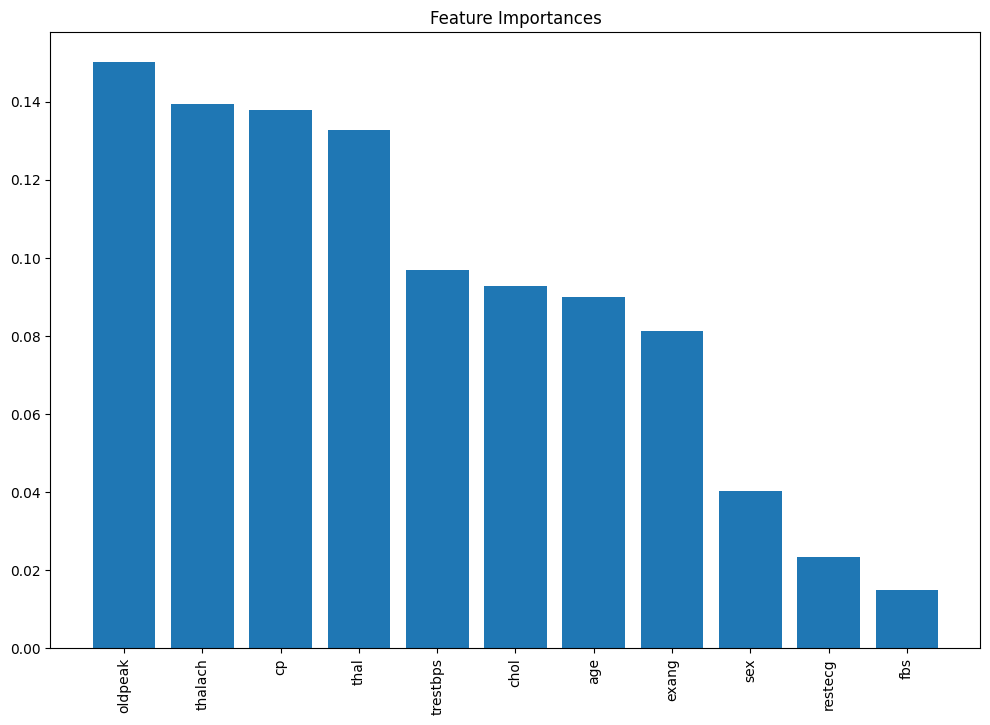

In [37]:
# Plot
plt.figure(figsize=(12, 8))

plt.title("Feature Importances")

plt.bar(range(X.shape[1]), importances[indices], align='center')

plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)

plt.show()

In [38]:
# Predictions and evaluation for default parameters
y_pred_default = rf_default.predict(X_test)

conf_matrix_default = confusion_matrix(y_test, y_pred_default)

class_report_default = classification_report(y_test, y_pred_default)


In [39]:
# Predictions and evaluation for tuned parameters
y_pred_tuned = rf_tuned.predict(X_test)

conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)

class_report_tuned = classification_report(y_test, y_pred_tuned)

In [40]:
# Print evaluation results
print("Confusion Matrix (Default Parameters):")

print(conf_matrix_default)

print("\nClassification Report (Default Parameters):")

print(class_report_default)

print("\nConfusion Matrix (Tuned Parameters):")

print(conf_matrix_tuned)

print("\nClassification Report (Tuned Parameters):")

print(class_report_tuned)

Confusion Matrix (Default Parameters):
[[33  8]
 [ 9 41]]

Classification Report (Default Parameters):
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        41
           1       0.84      0.82      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91


Confusion Matrix (Tuned Parameters):
[[35  6]
 [ 9 41]]

Classification Report (Tuned Parameters):
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        41
           1       0.87      0.82      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



In [41]:
# Feature importance
importances = rf_tuned.feature_importances_

indices = np.argsort(importances)[::-1]

In [42]:
# print feature ranking
print("Feature Ranking:")

for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {X.columns[indices[f]]} ({importances[indices[f]]})")

Feature Ranking:
1. Feature oldpeak (0.15031823697520655)
2. Feature thalach (0.1393815228221421)
3. Feature cp (0.137928557758453)
4. Feature thal (0.132702970845739)
5. Feature trestbps (0.09684530677876714)
6. Feature chol (0.09285318873676332)
7. Feature age (0.08993403154775281)
8. Feature exang (0.0813720477515122)
9. Feature sex (0.04037612296326341)
10. Feature restecg (0.02337912594001699)
11. Feature fbs (0.014908887880383493)


In [43]:
### Summary of findings
print("\nImplications of the Findings:")


Implications of the Findings:


In [44]:
### Compare performance metrics
default_accuracy = (conf_matrix_default[0, 0] + conf_matrix_default[1, 1]) / np.sum(conf_matrix_default)

tuned_accuracy = (conf_matrix_tuned[0, 0] + conf_matrix_tuned[1, 1]) / np.sum(conf_matrix_tuned)

print(f"Accuracy (Default Parameters): {default_accuracy:.2f}")

print(f"Accuracy (Tuned Parameters): {tuned_accuracy:.2f}")

Accuracy (Default Parameters): 0.81
Accuracy (Tuned Parameters): 0.84


In [45]:
### Performance comparison
if tuned_accuracy > default_accuracy:
    print("\nThe tuned Random Forest model shows improved accuracy compared to the default model, suggesting that parameter tuning can significantly enhance model performance.")
else:
    print("\nThe tuned Random Forest model does not show significant improvement over the default model, suggesting that the default parameters are already optimal for this dataset.")


The tuned Random Forest model shows improved accuracy compared to the default model, suggesting that parameter tuning can significantly enhance model performance.


In [46]:
# Feature importance
print("\nMost Important Features in Predicting Heart Disease:")

important_features = X.columns[indices][:5]

print(", ".join(important_features))


Most Important Features in Predicting Heart Disease:
oldpeak, thalach, cp, thal, trestbps


In [47]:
# Implications
print("\nImplications for Clinical Use:")

print("1. The identified important features (e.g., 'thalach', 'cp') are critical in predicting heart disease and can be targeted for closer monitoring in clinical practice.")

print("2. The improved accuracy with the tuned model indicates the potential for enhanced predictive performance with further optimization.")

print("3. These findings can assist clinicians in focusing on the most relevant features for early detection and management of heart disease.")


Implications for Clinical Use:
1. The identified important features (e.g., 'thalach', 'cp') are critical in predicting heart disease and can be targeted for closer monitoring in clinical practice.
2. The improved accuracy with the tuned model indicates the potential for enhanced predictive performance with further optimization.
3. These findings can assist clinicians in focusing on the most relevant features for early detection and management of heart disease.


In [51]:
# Grid search for hyper parameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters found:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


In [52]:
## SHAP for model interpretation
import shap

In [53]:
# Fit the model
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [54]:
# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(rf_tuned)

shap_values = explainer.shap_values(X_test)

In [55]:
# Ensure the shap_values have the correct shape
if len(shap_values) == 2: # For binary classification, shap_values returns a list of elements
    shap_values = shap_values[1] # Use shap_values for the positive class

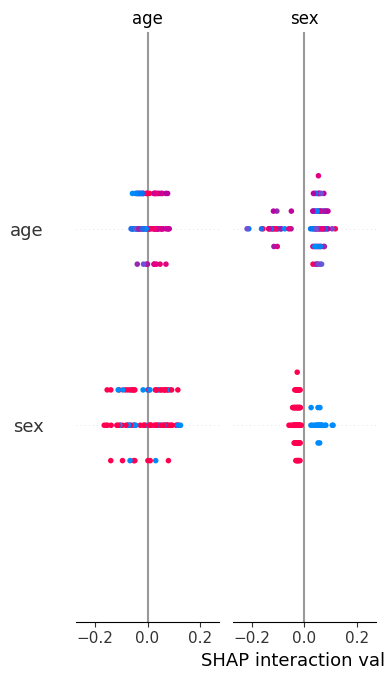

In [56]:
# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test)